In [9]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [10]:
models = '../../models'

In [11]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [12]:
grid_results = fitted_model.cv_results_

In [13]:
grid_results

{'mean_fit_time': array([111.91202655, 115.73310637, 129.64140544,  98.8732316 ,
        112.05694432, 135.64605937, 100.01203876, 114.48697977,
        112.56029439]),
 'std_fit_time': array([ 2.76605186,  7.75974019,  1.41357924,  2.82177672,  2.33239226,
         0.66554713,  2.26615341,  0.34444564, 10.53567458]),
 'mean_score_time': array([3.35591054, 5.05049639, 9.56689   , 2.83125496, 5.02491226,
        9.97019877, 1.89719992, 2.69793158, 4.96658335]),
 'std_score_time': array([0.19893209, 0.33138008, 0.42709856, 0.13101418, 0.15769946,
        0.29993838, 0.10412506, 0.16341616, 0.34332059]),
 'param_clf__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_clf__max_depth': masked_array(data=[1, 2, 4, 1, 2, 4, 1, 2, 4],
              mask=[False, False, False, False, False, False

In [14]:
AUC = grid_results['mean_test_score']

learning_rate


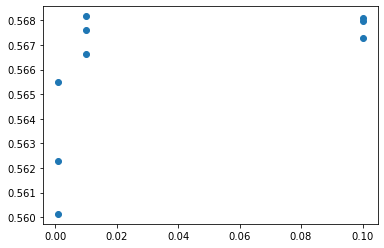

max_depth


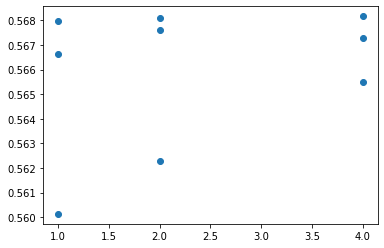

{'learning_rate': array([0.1  , 0.1  , 0.1  , 0.01 , 0.01 , 0.01 , 0.001, 0.001, 0.001]),
 'max_depth': array([1., 2., 4., 1., 2., 4., 1., 2., 4.])}

In [15]:
param_dict = {}
for key, value in grid_results.items():
    if 'param_clf__' in key:
        name = key.replace('param_clf__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()
    elif 'poly__' in key:
        name = key.replace('poly__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()

param_dict

In [16]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.568168 using {'clf__learning_rate': 0.01, 'clf__max_depth': 4}


In [9]:
fitted_model.cv_results_

{'iter': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [10]:
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
# alphas = np.ma.getdata(grid_results['param_clf__alpha'])
# rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
# dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

KeyError: 'param_clf__learning_rate'

In [11]:
log_rates =np.log(rates)

NameError: name 'rates' is not defined

In [12]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

NameError: name 'log_rates' is not defined

In [13]:
df.columns = ['log_rates', 'dims', 'auc']

NameError: name 'df' is not defined

NameError: name 'df' is not defined

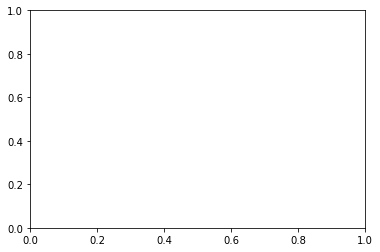

In [14]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

In [15]:
alphas = np.array(alphas, dtype=np.float)
log_alphas =np.log(alphas)
plt.scatter(log_alphas, AUC)

NameError: name 'alphas' is not defined

In [16]:
plt.scatter(log_rates, AUC)

NameError: name 'log_rates' is not defined

In [17]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined